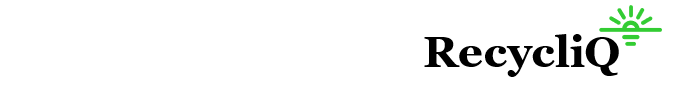

# **Research Project**
### OLUWATOBI EKUNDAYO - x19173105
#### **MSc. Data Analytics, National College of Ireland**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
  <li><span><a href="#Experiment-N:-Test-ML/DL-Models-with-NEW-dataset" data-toc-modified-id="Experiment-N:-Test-ML/DL-Models-with-NEW-dataset-1"><span class="toc-item-num">1.&nbsp;&nbsp;</span>Experiment N: Test ML/DL Models with NEW dataset</a></span></li>
  <li><span><a href="#Experiment-2:-State-of-the-art-Model" data-toc-modified-id="Experiment-2:-State-of-the-art-Model-2"><span class="toc-item-num">2.&nbsp;&nbsp;</span>Experiment 2: State-of-the-art Model</a></span></li>
  <li><span><a href="#Experiment-3:-MobileNetV2-Model" data-toc-modified-id="Experiment-3:-MobileNetV2-Model-3"><span class="toc-item-num">3.&nbsp;&nbsp;</span>Experiment 3: MobiletNetV2 Model</a></span></li>
  <li><span><a href="#Experiment-4:-EfficientNet-Model" data-toc-modified-id="Experiment-4:-EfficientNet-Model-4"><span class="toc-item-num">4.&nbsp;&nbsp;</span>Experiment 4: EfficientNet Model</a></span></li>
  <li><span><a href="#Experiment-5:-DenseNet-Model" data-toc-modified-id="Experiment-5:-DenseNet-Model-5"><span class="toc-item-num">5.&nbsp;&nbsp;</span>Experiment 5: DenseNet Model</a></span></li>
  <li><span><a href="#Experiment-6:-ResNet152-Model" data-toc-modified-id="Experiment-6:-ResNet152-Model-6"><span class="toc-item-num">6.&nbsp;&nbsp;</span>Experiment 6: ResNet152 Model</a></span></li>
  <li><span><a href="#Experiment-7:-Inception-ResNet-V2-Model" data-toc-modified-id="Experiment-7:-Inception-ResNet-V2-Model-7"><span class="toc-item-num">7.&nbsp;&nbsp;</span>Experiment 7: Inception-ResNet-V2 Model</a></span></li>
  <li><span><a href="#EVALUATION:-Compare-Model-Performance" data-toc-modified-id="EVALUATION:-Compare-Model-Performance-8"><span class="toc-item-num">8.&nbsp;&nbsp;</span>EVALUATION: Compare Model Performance</a></span></li>  
 </ul></div>

## **Experiment N: Test ML/DL Models with NEW dataset**





### **Import Packages**

In [ ]:
#Install the package if it hasn't been installed on your colab before.
#!pip install scikit-learn

In [ ]:
import tensorflow as tf
import pandas as pd
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# use seaborn plotting defaults
import seaborn as sns; sns.set_theme()

tf.__version__

'2.3.0'

### **Setting Up Input Connection To Google Drive**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth
from oauth2client.client import GoogleCredentials

**Get google drive authentication code**

In [ ]:
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

**Set path to extract file from gdrive**

In [ ]:
fid = drive.ListFile({'q':"title='trashnet_dataset.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('trashnet_dataset.zip')

**Unzip the file from google drive**

In [ ]:
!unzip \*.zip  && rm *.zip 

### **Setup Input Pipeline**
Delete the .txt or .json files from Colab Files before running this code

In [ ]:
PATH = "/content/trashnet_dataset"
dirs = os.listdir(PATH)
for file in dirs:
  print (file)

cardboard
plastic
glass
trash
paper
metal


**Dataset Summary**

In [ ]:
from pathlib import Path

ds = len(dirs)
data_dir = Path(PATH)
image_count = len(list(data_dir.glob('*/*.jpg')))
print("There are a total of " + str(image_count) +
      " Images and " + str(ds) + " Classes in this dataset.")

There are a total of 2527 Images and 6 Classes in this dataset.


### **Preparing the data**

Use **`ImageDataGenerator`** to rescale the images to **train and validation generator**.

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.3)

train_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=20,
    subset='training')

val_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    seed=20,
    subset='validation')

Found 1771 images belonging to 6 classes.
Found 756 images belonging to 6 classes.


**Extract converted ML Image/Label for the Training and Test data**

In [ ]:
for image_train, label_train in train_generator:
  break
Xtrain = image_train
ytrain = label_train
# Get Shape
image_train.shape, label_train.shape

((32, 256, 256, 3), (32, 6))

In [ ]:
for image_test, label_test in val_generator:
  break
Xtest = image_test
ytest = label_test
# Get Shape
image_test.shape, label_test.shape

((32, 256, 256, 3), (32, 6))

**Visualise the data**

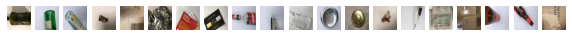

In [ ]:
sample_training_images, _ = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 20, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout
    plt.show()

plotImages(sample_training_images[:20])

**Save the labels in a file which will be downloaded later.**

In [ ]:
print (train_generator.class_indices)
wastelabels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('wastelabels.txt', 'w') as f:
  f.write(wastelabels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [ ]:
!cat wastelabels.txt

cardboard
glass
metal
paper
plastic
trash

In [ ]:
ab = sorted(train_generator.class_indices.keys())
label_names =np.array(list(ab))
kb = sorted(val_generator.class_indices.keys())
labelval_names =np.array(list(kb))
type(labelval_names)

numpy.ndarray

## **Experiment 2: ``State-of-the-art`` Model**


**Reshaping the Train and Test data**

In [ ]:
# When using size 224 reshape with (32*6,112*224)
# When using size 256 reshape with (32*6,128*256)

X_train = Xtrain.reshape(32*6,112*224)
X_test = Xtest.reshape(32*6,112*224)

y_train = ytrain.flatten()
y_test = ytest.flatten()

**Support Vector Machine (SVM)**

In [ ]:
#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Evaluation Metrics**

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# SVM Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# SVM Model Precision
print("\nPrecision:",metrics.precision_score(y_test, y_pred))
# SVM Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6875

Precision: 0.20833333333333334
Recall: 0.3125


**Converting numerical labels to categorical format**

In [ ]:
def ToCategory(zz):
    bb=0
    jj=list()
    
    for n in zz:
        if (n == [1., 0., 0., 0., 0., 0.]):
            bb = 0
        if (n == [0., 1., 0., 0., 0., 0.]):
            bb = 1
        if (n == [0., 0., 1., 0., 0., 0.]):
            bb = 2
        if (n == [0., 0., 0., 1., 0., 0.]):
            bb = 3
        if (n == [0., 0., 0., 0., 1., 0.]):
            bb = 4
        if (n == [0., 0., 0., 0., 0., 1.]):
            bb = 5
        jj.append(bb)
    kk = np.asarray(jj)
    return kk

# Convert test label to category format
cc = ytest.tolist()
yTEST = ToCategory(cc)

**Display the confusion matrix between the classes**

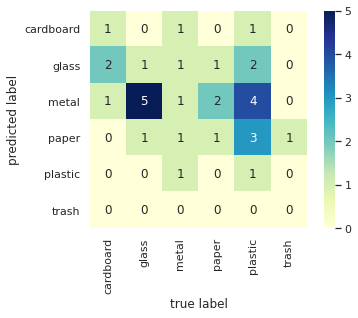

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert prediction label to category format
yy = y_pred.reshape(32,6)
dd = yy.tolist()
yPRED = ToCategory(dd)

mat = confusion_matrix(yTEST, yPRED)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True,
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### **Using PCA (feature extraction) + SVM (classifier) Model**

In [ ]:
# Set PCA for feature extraction
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
# Set SVM for classification
svc = SVC(kernel='rbf', class_weight='balanced')
# Setup the model
svm_model = make_pipeline(pca, svc)

Use **``grid search cross-validation``** to explore combinations of parameters.
Here we will adjust **``C``** (which controls the margin hardness) and **``gamma``** (which controls the size of the radial basis function kernel), and determine the best model:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm_model, param_grid, cv=5)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 1min 58s, sys: 16.1 s, total: 2min 14s
Wall time: 1min 8s
{'svc__C': 5, 'svc__gamma': 0.005}


**``The optimal values from the grid search falls toward the middle of the grid``**

**Using the cross-validated model** - Predict the labels for the test data, which the model has not yet seen.

In [ ]:
svm_model = grid.best_estimator_
yfit = svm_model.predict(X_test)

**Evaluation Metrics**

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yfit))

Accuracy: 0.765625


**Using the classification report we evaluate the estimator's performance**

In [ ]:
from sklearn.metrics import classification_report

# Convert prediction label to category format
gg = yfit.reshape(32,6)
pp = gg.tolist()
yFIT = ToCategory(pp)

print(classification_report(yTEST, yFIT, target_names=label_names))

              precision    recall  f1-score   support

   cardboard       0.25      0.50      0.33         4
       glass       0.12      0.14      0.13         7
       metal       0.00      0.00      0.00         5
       paper       0.25      0.25      0.25         4
     plastic       0.00      0.00      0.00        11
       trash       0.00      0.00      0.00         1

    accuracy                           0.12        32
   macro avg       0.10      0.15      0.12        32
weighted avg       0.09      0.12      0.10        32



**Display the confusion matrix between the classes**

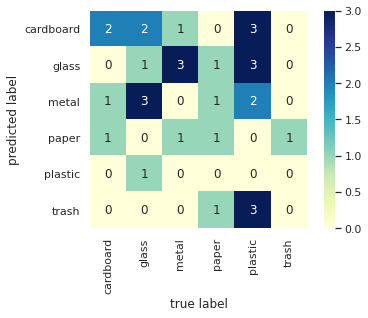

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yTEST, yFIT)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=True,
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Summary:

* **Model**: State-of-the-art Model (SVM)
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 3: ``MobileNetV2`` Model**

### **Create base model from the pre-trained convnets**

We instantiate a **`MobileNetV2`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_3 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_3.trainable = False

**Add a classification head**

In [ ]:
mnv2_model = tf.keras.Sequential([
  base_model_3,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
mnv2_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
mnv2_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(mnv2_model.trainable_variables)))

### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10
history_3 = mnv2_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

In [ ]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model_3.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_3.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_3.layers[:fine_tune_at]:
  layer.trainable =  False

**Compile the model** - using a much lower training rate.

In [ ]:
mnv2_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
mnv2_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(mnv2_model.trainable_variables)))

### **Complete model training**

In [ ]:
history_fine3 = mnv2_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=20, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

In [ ]:
acc = history_fine_3.history['accuracy']
val_acc = history_fine_3.history['val_accuracy']

loss = history_fine_3.history['loss']
val_loss = history_fine_3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(mnv2_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_3 = converter.convert()

with open('mnv2_model.tflite', 'wb') as f:
  f.write(tflite_model_3)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('mnv2_model.tflite')
files.download('wastelabels.txt')

### Summary:

* **Model**: MobileNetV2 Model
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 4: ``EfficientNet`` Model**

### **Create base model from the pre-trained convnets**

We instantiate a **`EfficientNet`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_4 = tf.keras.applications.EfficientNetB7(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_4.trainable = False

**Add a classification head**

In [ ]:
efn_model = tf.keras.Sequential([
  base_model_4,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
efn_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
efn_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(efn_model.trainable_variables)))

### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history_4 = efn_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

In [ ]:
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.


In [ ]:
base_model_4.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_4.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_4.layers[:fine_tune_at]:
  layer.trainable =  False

**Compile the model** - using a much lower training rate.

In [ ]:
efn_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
efn_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(efn_model.trainable_variables)))

### **Complete model training**

In [ ]:
history_fine_4 = efn_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=20, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

In [ ]:
acc = history_fine_4.history['accuracy']
val_acc = history_fine_4.history['val_accuracy']

loss = history_fine_4.history['loss']
val_loss = history_fine_4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(efn_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_4 = converter.convert()

with open('efn_model.tflite', 'wb') as f:
  f.write(tflite_model_4)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('efn_model.tflite')
files.download('wastelabels.txt')

### Summary:

* **Model**: EfficientNet Model
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 5: ``DenseNet`` Model**

### **Create base model from the pre-trained convnets**

We instantiate a **`DenseNet`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_5 = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_5.trainable = False

**Add a classification head**

In [ ]:
dsn_model = tf.keras.Sequential([
  base_model_5,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
dsn_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
dsn_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(dsn_model.trainable_variables)))

### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history_5 = dsn_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

In [ ]:
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model_5.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_5.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_5.layers[:fine_tune_at]:
  layer.trainable =  False

**Compile the model** - using a much lower training rate.

In [ ]:
dsn_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
dsn_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(dsn_model.trainable_variables)))

### **Complete model training**

In [ ]:
history_fine_5 = dsn_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=20, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

In [ ]:
acc = history_fine_5.history['accuracy']
val_acc = history_fine_5.history['val_accuracy']

loss = history_fine_5.history['loss']
val_loss = history_fine_5.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(dsn_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_5 = converter.convert()

with open('dsn_model.tflite', 'wb') as f:
  f.write(tflite_model_5)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('dsn_model.tflite')
files.download('wastelabels.txt')

### Summary:

* **Model**: DenseNet Model
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 6: ``ResNet152`` Model**

### **Create base model from the pre-trained convnets**

We instantiate a **`ResNet152`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_6 = tf.keras.applications.ResNet152(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_6.trainable = False

**Add a classification head**

In [ ]:
rsn152_model = tf.keras.Sequential([
  base_model_6,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
rsn152_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
rsn152_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(rsn152_model.trainable_variables)))

### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history_6 = rsn152_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

In [ ]:
acc = history_6.history['accuracy']
val_acc = history_6.history['val_accuracy']

loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model_6.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_6.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_6.layers[:fine_tune_at]:
  layer.trainable =  False

**Compile the model** - using a much lower training rate.

In [ ]:
rsn152_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
rsn152_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(rsn152_model.trainable_variables)))

### **Complete model training**

In [ ]:
history_fine_6 = rsn152_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=20, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

In [ ]:
acc = history_fine_6.history['accuracy']
val_acc = history_fine_6.history['val_accuracy']

loss = history_fine_6.history['loss']
val_loss = history_fine_6.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(rsn152_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_6 = converter.convert()

with open('rsn152_model.tflite', 'wb') as f:
  f.write(tflite_model_6)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('rsn152_model.tflite')
files.download('wastelabels.txt')

### Summary:

* **Model**: ResNet152 Model
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:

## **Experiment 7: ``Inception-ResNet-V2`` Model**

**NOTE: Input shape for `Inception-ResNet-V2` must be (299, 299, 3)**

### **Create base model from the pre-trained convnets**

We instantiate a **`Inception-ResNet-V2`** model pre-loaded with weights trained on ImageNet. By specifying the **`include_top=False`** argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model_7 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

### **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model_7.trainable = False

**Add a classification head**

In [ ]:
irsnv2_model = tf.keras.Sequential([
  base_model_7,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
irsnv2_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
irsnv2_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(irsnv2_model.trainable_variables)))

### **Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history_7 = irsnv2_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

In [ ]:
acc = history_7.history['accuracy']
val_acc = history_7.history['val_accuracy']

loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Fine tuning**

To increase performance we'll train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the added classifier. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

**Un-freeze the top layers of the model**

Unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model_7.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_7.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_7.layers[:fine_tune_at]:
  layer.trainable =  False

**Compile the model** - using a much lower training rate.

In [ ]:
irsnv2_model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

**Model Summary**

In [ ]:
irsnv2_model.summary()

In [ ]:
print('Number of trainable variables = {}'.format(len(irsnv2_model.trainable_variables)))

### **Complete model training**

In [ ]:
history_fine_7 = irsnv2_model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=20, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

**Plot learning curves of the training and validation accuracy/loss**

In [ ]:
acc = history_fine_7.history['accuracy']
val_acc = history_fine_7.history['val_accuracy']

loss = history_fine_7.history['loss']
val_loss = history_fine_7.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(irsnv2_model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model_7 = converter.convert()

with open('irsnv2_model.tflite', 'wb') as f:
  f.write(tflite_model_7)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('irsnv2_model.tflite')
files.download('wastelabels.txt')

### Summary:

* **Model**: Inception-Resnet-V2 Model
* **Size**:
* **Loss**: 
* **Latency**:
* **Training Time**:

## **EVALUATION: Compare Model Performance**

### **All trained models**

In [ ]:
#history_fine

#svm_model
#mnv2_model
#efn_model
#dsn_model
#rsn152_model
#irsnv2_model

**Plot learning curves of the training and validation accuracy/loss**

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### **Export model performance**

In [ ]:
with open('irsnv2_model.tflite', 'wb') as f:
  f.write(tflite_model_7)

**Download the files**

In [ ]:
from google.colab import files

files.download('modelperformance.xls')
files.download('modelperformance.jpeg')

### Summary:

* **Using a pre-trained model for feature extraction**:  When working with a small dataset, it is common to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training.
In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.

* **Fine-tuning a pre-trained model**: To further improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning.
In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the orginial dataset that the pre-trained model was trained on.
